
[INFO] accessing MNIST...

[INFO] training network...
Epoch 1/100


469/469 [==============================] - 5s 8ms/step - loss: 2.2801 - accuracy: 0.2153 - val_loss: 2.2367 - val_accuracy: 0.2131
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 2.2022 - accuracy: 0.3783 - val_loss: 2.1602 - val_accuracy: 0.5476
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 2.1129 - accuracy: 0.5076 - val_loss: 2.0508 - val_accuracy: 0.6105
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 1.9826 - accuracy: 0.5790 - val_loss: 1.8918 - val_accuracy: 0.6140
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.8017 - accuracy: 0.6275 - val_loss: 1.6847 - val_accuracy: 0.6789
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.5843 - accuracy: 0.6719 - val_loss: 1.4581 - val_accuracy: 0.7183
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.3678 - a

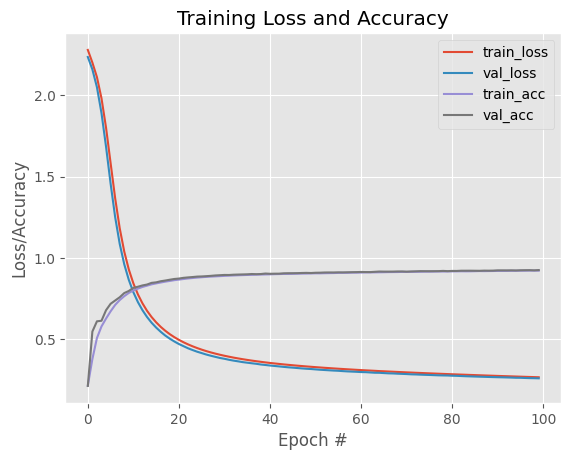

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse as ap
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
 metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
 epochs=100, batch_size=128)

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
 predictions.argmax(axis=1),
 target_names=[str(x) for x in lb.classes_]))
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()